## 1. Dataset Preprocess

In [5]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:
from datasets import load_dataset
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
ds = load_dataset("dair-ai/emotion", "unsplit")
data = pd.DataFrame(ds['train'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/26.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/416809 [00:00<?, ? examples/s]

In [8]:
data.head(5)

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
words_to_remove = {'feel','im','think','know','wa','one','time','thing','people','still'} # from word cloud

In [11]:
def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    words_lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in words]
    words = [word for word in words if word not in stop_words and word not in words_to_remove]

    return ' '.join(words)

data['cleaned_text'] = data['text'].apply(preprocess_text)
description = data.describe()
print(description)

               label
count  416809.000000
mean        1.554271
std         1.490453
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         5.000000


In [12]:
# data['length'] = data['text'].apply(len)

In [13]:
data.head(5)

,text,label,cleaned_text
0,i feel awful about it too because it s my job ...,0,awful job get position succeed happen
1,im alone i feel awful,0,alone awful
2,ive probably mentioned this before but i reall...,1,ive probably mentioned really proud actually k...
3,i was feeling a little low few days back,0,feeling little low day back
4,i beleive that i am much more sensitive to oth...,2,beleive much sensitive feeling tend compassionate


In [14]:
# data.to_csv('emotiondata.csv', index=False, encoding='utf-8-sig')

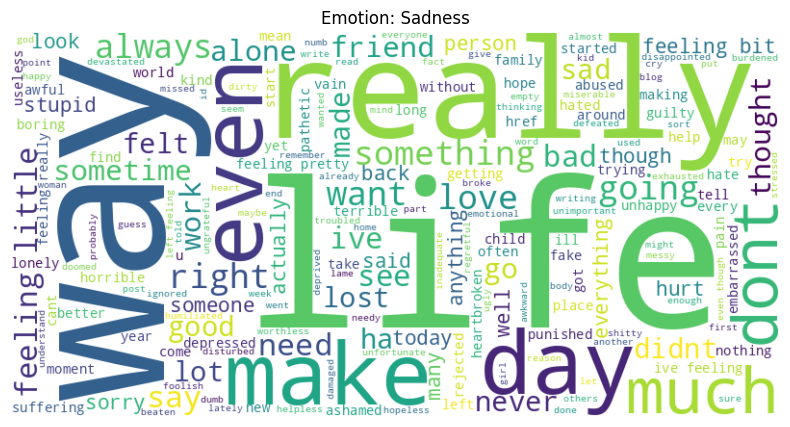

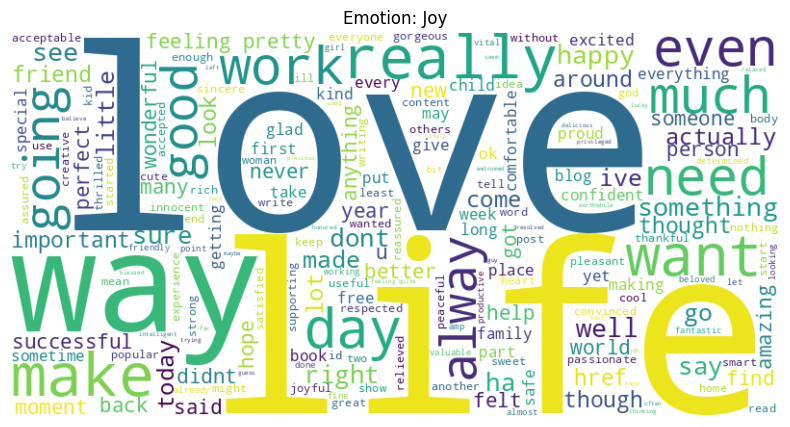

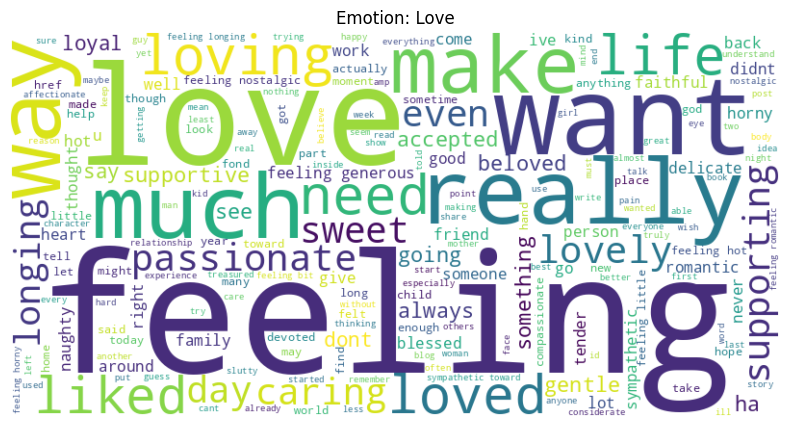

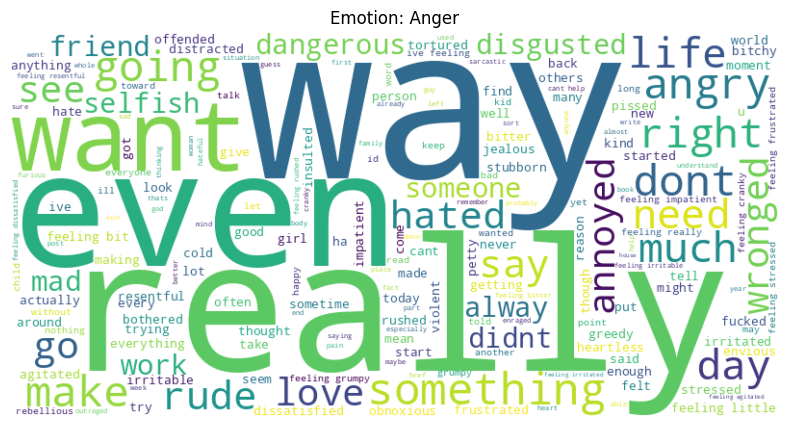

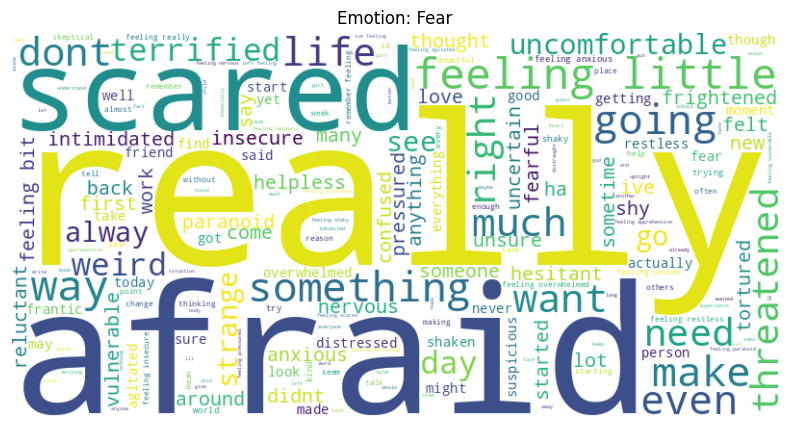

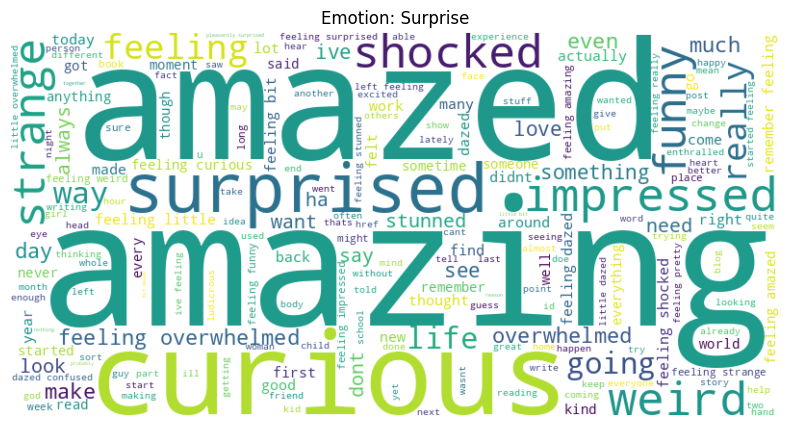

In [15]:
emotion_labels = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

for emotion, label in emotion_labels.items():
    texts = [data['cleaned_text'][i] for i in range(len(data['label'])) if data['label'][i] == emotion]

    all_text = ' '.join(texts)

    if all_text:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Emotion: {label}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No text available for emotion '{label}'")

sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5)


## 2. Main function: train all candidates

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import re
import nltk
#data = pd.read_csv('/content/emotiondata.csv')

In [6]:
# 卸载现有的 torch 和 torchtext
!pip uninstall -y torch torchtext

# 安装兼容的版本（例如，PyTorch 2.0.1 和 TorchText 0.15.2）
!pip install torch==2.0.1 torchtext==0.15.2


Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchtext 0.15.2
Uninstalling torchtext-0.15.2:
  Successfully uninstalled torchtext-0.15.2
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached torchtext-0.15.2-cp310-cp310-manylinux1_x86_64.whl.metadata (7.4 kB)
Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
Using cached torchtext-0.15.2-cp310-cp310-manylinux1_x86_64.whl (2.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.0.1 which is incompatible.
torchvision 0.20.1+cu121 requires torch==2.5.1, but you have torch 2.0.1 which is incompatible.


In [ ]:
# **Step 1: Import Necessary Libraries**

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer  # For Basic English Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import time

# **Additional Tokenizers**
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
import spacy
import sys
import subprocess

# Install SpaCy English model if not already installed
try:
    nlp = spacy.load('en_core_web_sm')
except:
    subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load('en_core_web_sm')

import re

# **Step 2: Load and Preprocess Data**

# Assume your data is loaded into a DataFrame named 'data'
# Replace this with your actual data loading code
# data = pd.read_csv('your_data.csv')

# Sample size
X = data['cleaned_text']
y = data['label']

# Encode labels as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42)

# Handle missing values and ensure data type is string
X_train = X_train.fillna('').astype(str).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)
X_test = X_test.fillna('').astype(str).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# **Step 3: Define Tokenizers**

# 1. Basic English Tokenizer
tokenizer_basic = get_tokenizer('basic_english')

# 2. NLTK Word Tokenizer
tokenizer_nltk = word_tokenize

# 3. SpaCy Tokenizer
def spacy_tokenizer(text):
    return [token.text for token in nlp(text)]
tokenizer_spacy = spacy_tokenizer

# **Step 4: Define the Dataset Classes**

# Text Dataset for models that use tokenized inputs
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, vocab_dict):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.text_pipeline = lambda x: [vocab_dict.get(tok, 0) for tok in tokenizer(x)]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = torch.tensor(self.text_pipeline(self.texts[idx]), dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text, label

# TF-IDF Dataset for MLP with TF-IDF features
class TfidfDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# **Step 5: Define the Collate Function**

def collate_batch(batch):
    text_list, label_list = [], []
    for (_text, _label) in batch:
        text_list.append(_text)
        label_list.append(_label)
    text_list = pad_sequence(text_list, batch_first=True, padding_value=0)
    label_list = torch.tensor(label_list, dtype=torch.long)
    return text_list, label_list

# **Step 6: Define Models**

# 1. Multilayer Perceptron (MLP)
class MLPModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(MLPModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)  # Removed sparse=True
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# 2. Convolutional Neural Network (CNN)
class CNNModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.conv = nn.Conv1d(64, 100, kernel_size=3)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(100, num_classes)

    def forward(self, text):
        embedded = self.embedding(text).permute(0, 2, 1)
        conved = self.conv(embedded)
        pooled = self.pool(conved).squeeze(2)
        return self.fc(pooled)

# 3. Long Short-Term Memory Network (LSTM)
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.lstm = nn.LSTM(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 4. Gated Recurrent Unit (GRU)
class GRUModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.gru = nn.GRU(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, hidden = self.gru(embedded)
        return self.fc(hidden[-1])

# 5. FastText Model
class FastTextModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(FastTextModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# MLP Model for TF-IDF Features
class MLPModel_TFIDF(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLPModel_TFIDF, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# **Step 7: Prepare for Multiple Tokenizers**

tokenizers = {
    'NLTK': tokenizer_nltk,
    'Basic English': tokenizer_basic,
    'SpaCy': tokenizer_spacy
}

# **Step 8: Initialize Results Dictionary**

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Time (s)": []
}

# **Step 9: Training and Evaluation Loop**

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_classes = len(set(y_train))

for tokenizer_name, tokenizer in tokenizers.items():
    print(f"\nUsing {tokenizer_name} tokenizer...")

    # **Rebuild Vocabulary**
    from collections import Counter
    counter = Counter()
    for text in X_train:
        counter.update(tokenizer(text))
    vocab = sorted(counter, key=counter.get, reverse=True)
    vocab_dict = {word: idx+1 for idx, word in enumerate(vocab)}
    vocab_size = len(vocab_dict)

    # **Create Datasets and DataLoaders**
    train_dataset = TextDataset(X_train, y_train, tokenizer, vocab_dict)
    test_dataset = TextDataset(X_test, y_test, tokenizer, vocab_dict)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch)

    # **Initialize Models**
    deep_models = {
        "MLP": MLPModel(vocab_size, num_classes),
        "CNN": CNNModel(vocab_size, num_classes),
        "LSTM": LSTMModel(vocab_size, num_classes),
        "GRU": GRUModel(vocab_size, num_classes),
        "FastText": FastTextModel(vocab_size, num_classes),
    }

    for model_name, model in deep_models.items():
        print(f"\nTraining {model_name} with {tokenizer_name} tokenizer...")
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        start_time = time.time()
        epochs = 5
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for text, labels in train_loader:
                text, labels = text.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(text)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
        end_time = time.time()

        # **Evaluation**
        model.eval()
        preds = []
        trues = []
        with torch.no_grad():
            for text, labels in test_loader:
                text = text.to(device)
                outputs = model(text)
                _, predicted = torch.max(outputs.data, 1)
                preds.extend(predicted.cpu().numpy())
                trues.extend(labels.numpy())
        accuracy = accuracy_score(trues, preds)
        precision = precision_score(trues, preds, average='weighted', zero_division=0)
        recall = recall_score(trues, preds, average='weighted', zero_division=0)
        f1 = f1_score(trues, preds, average='weighted', zero_division=0)
        elapsed_time = end_time - start_time

        # **Print and Save Results**
        print(f"{model_name} with {tokenizer_name} tokenizer Results:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Time (s): {elapsed_time:.2f}")

        results["Model"].append(f"{model_name} ({tokenizer_name})")
        results["Accuracy"].append(accuracy)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        results["F1-Score"].append(f1)
        results["Time (s)"].append(elapsed_time)

# **Add TF-IDF MLP Model**

print("\nTraining MLP with TF-IDF features...")

# **Generate TF-IDF Features**

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create Datasets and DataLoaders for TF-IDF
train_dataset_tfidf = TfidfDataset(X_train_tfidf.toarray(), y_train)
test_dataset_tfidf = TfidfDataset(X_test_tfidf.toarray(), y_test)

train_loader_tfidf = DataLoader(train_dataset_tfidf, batch_size=batch_size, shuffle=True)
test_loader_tfidf = DataLoader(test_dataset_tfidf, batch_size=batch_size)

# Initialize TF-IDF MLP Model
input_dim = X_train_tfidf.shape[1]
model = MLPModel_TFIDF(input_dim, num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
start_time = time.time()
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for features, labels in train_loader_tfidf:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader_tfidf)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
end_time = time.time()

# **Evaluation**
model.eval()
preds = []
trues = []
with torch.no_grad():
    for features, labels in test_loader_tfidf:
        features = features.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        preds.extend(predicted.cpu().numpy())
        trues.extend(labels.numpy())
accuracy = accuracy_score(trues, preds)
precision = precision_score(trues, preds, average='weighted', zero_division=0)
recall = recall_score(trues, preds, average='weighted', zero_division=0)
f1 = f1_score(trues, preds, average='weighted', zero_division=0)
elapsed_time = end_time - start_time

# **Print and Save Results**
print(f"MLP with TF-IDF Results:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  Time (s): {elapsed_time:.2f}")

results["Model"].append("MLP (TF-IDF)")
results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)
results["Time (s)"].append(elapsed_time)

# **Step 10: Create Results DataFrame**

results_df = pd.DataFrame(results)

# **Step 11: Generate Bar Charts**

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Time (s)"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(results_df["Model"], results_df[metric], alpha=0.75)
    plt.title(f"Model Comparison - {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Step 12: Display Results Table**

print("\nFinal Results:")
print(results_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Using NLTK tokenizer...

Training MLP with NLTK tokenizer...
Epoch 1/5, Loss: 0.7831
Epoch 2/5, Loss: 0.2492
Epoch 3/5, Loss: 0.2140
Epoch 4/5, Loss: 0.1978
Epoch 5/5, Loss: 0.1887
MLP with NLTK tokenizer Results:
  Accuracy: 0.8965
  Precision: 0.8960
  Recall: 0.8965
  F1-Score: 0.8958
  Time (s): 229.39

Training CNN with NLTK tokenizer...
Epoch 1/5, Loss: 0.3940
Epoch 2/5, Loss: 0.1772
Epoch 3/5, Loss: 0.1591
Epoch 4/5, Loss: 0.1480
Epoch 5/5, Loss: 0.1369
CNN with NLTK tokenizer Results:
  Accuracy: 0.9073
  Precision: 0.9075
  Recall: 0.9073
  F1-Score: 0.9072
  Time (s): 235.05

Training LSTM with NLTK tokenizer...
Epoch 1/5, Loss: 0.5438
Epoch 2/5, Loss: 0.1623
Epoch 3/5, Loss: 0.1335
Epoch 4/5, Loss: 0.1182
Epoch 5/5, Loss: 0.1068
LSTM with NLTK tokenizer Results:
  Accuracy: 0.9212
  Precision: 0.9251
  Recall: 0.9212
  F1-Score: 0.9220
  Time (s): 249.14

Training GRU with NLTK tokenizer...
Epoch 1/5, Loss: 0.3667
Epoch 2/5, Loss: 0.1397
Epoch 3/5, Loss: 0.1209
Epoch 4/5, L